In [63]:
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import os,warnings,datetime,csv

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Dropout,BatchNormalization,Activation,Add,Concatenate,Conv2D,Input,AveragePooling1D,Conv2DTranspose,GRU

from sklearn.cluster import DBSCAN,KMeans
from sklearn.model_selection import train_test_split

from fuzzywuzzy import fuzz

warnings.filterwarnings('ignore')
sns.set()

In [3]:
df = pd.read_excel(open('.\data\italy.xlsm','rb'),sheet_name='SAP MD')

In [35]:
df

,SAP Country,Unnamed: 1,SAP Customer ID,Unnamed: 3,Name,Account Name 1,Street Name,Address 1,City,SAP Postal Code|Account Structure,Current
0,IT,Italy,24/0/315137,Bracco S.P.A,BRACCO S.P.A,#,VIA MILANO 20,#,#,20090,1
1,IT,Italy,24/0/318970,Istituto Behring S.p,ISTITUTO BEHRING S.P.A.,#,STRADA STATALE 17 KM 22,#,#,67019,1
2,IT,Italy,24/0/319912,ISTITUTO BEHRING SPA,ISTITUTO BEHRING SPA,#,"S.S.17,KM 22",#,#,67019,1
3,IT,Italy,24/0/324123,CENTRO MILITARE MEDI,CENTRO MILITARE MEDICINA,OSPEDALE MILITARE ALESSANDRO RIBERI,CSO IV NOVEMBRE 66,CORSO IV NOVEMBRE 66,TORINO,10136,1
4,IT,Italy,24/0/324124,***AZ.SAN.USL N.2,***AZ.SAN.USL N.2,#,VIA TOFANE 71,#,#,10141,1
5,IT,Italy,24/0/324125,***UNITA'SANITARIA L,***UNITA'SANITARIA LOCALE 1/23,#,CORSO BRAMANTE 88,#,#,10126,1
6,IT,Italy,24/0/324127,***AZIENDA USSL 17,***AZIENDA USSL 17,#,"VIA OSPEDALI,14",#,#,12038,1
7,IT,Italy,24/0/324128,AZIENDA SANITARIA OS,AZIENDA SANITARIA OSPEDALIERA S.,AO S.CROCE E CARLE,VIA COPPINO 26,VIA MICHELE COPPINO 26,CUNEO,12100,1
8,IT,Italy,24/0/324129,***AZIENDA USL 16 MO,***AZIENDA USL 16 MONDOVI'-CEVA,#,"VIA S. PIO V, 6",#,#,12084,1
9,IT,Italy,24/0/324130,***C.I.O.V. COM. IST,***C.I.O.V. COM. IST. OSP VALDESI,#,VIA BECKWITH 3,#,#,10066,1


In [119]:
names = df['Name'].values
basis = names[rnd.permutation(np.arange(0,len(names)))[:6]]

In [125]:
t = [[fuzz.ratio(basis[0],name),
      fuzz.ratio(basis[1],name),
      fuzz.ratio(basis[2],name),
      fuzz.ratio(basis[3],name),
      fuzz.ratio(basis[4],name),
      fuzz.ratio(basis[5],name)] for name in names]

In [127]:
T = pd.DataFrame(data=t,columns=['basis0','basis1','basis2','basis3','basis4','basis5'])

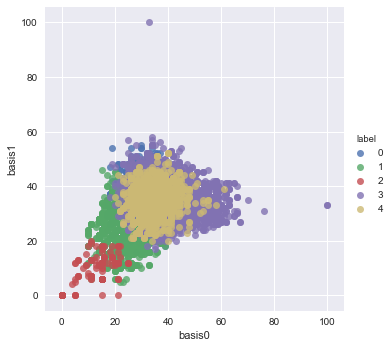

In [130]:
sns.lmplot(x='basis0',y='basis1',data=T,fit_reg=False)

In [185]:
sim_ratio = 80

sim_names = dict() 

num_rows = df.shape[0]
for pos in range(num_rows):

    t = T.iloc[pos].values[:-1]
    tname = df.iloc[pos]['Name']
    TT = T[['basis0','basis1','basis2','basis3','basis4','basis5']]-t
    sim_names[str(pos)+'__'+tname] = set([v for v in df[TT.sum(axis=1).abs()<2]['Name'].values if fuzz.ratio(tname,v)>sim_ratio])
    
    if pos%500==0: print('%d/%d'%(pos,num_rows))

0/26709
100/26709
200/26709
300/26709
400/26709
500/26709
600/26709
700/26709
800/26709
900/26709
1000/26709
1100/26709
1200/26709
1300/26709
1400/26709
1500/26709
1600/26709
1700/26709
1800/26709
1900/26709
2000/26709
2100/26709
2200/26709
2300/26709
2400/26709
2500/26709
2600/26709
2700/26709
2800/26709
2900/26709
3000/26709
3100/26709
3200/26709
3300/26709
3400/26709
3500/26709
3600/26709
3700/26709
3800/26709
3900/26709
4000/26709
4100/26709
4200/26709
4300/26709
4400/26709
4500/26709
4600/26709
4700/26709
4800/26709
4900/26709
5000/26709
5100/26709
5200/26709
5300/26709
5400/26709
5500/26709
5600/26709
5700/26709
5800/26709
5900/26709
6000/26709
6100/26709
6200/26709
6300/26709
6400/26709
6500/26709
6600/26709
6700/26709
6800/26709
6900/26709
7000/26709
7100/26709
7200/26709
7300/26709
7400/26709
7500/26709
7600/26709
7700/26709
7800/26709
7900/26709
8000/26709
8100/26709
8200/26709
8300/26709
8400/26709
8500/26709
8600/26709
8700/26709
8800/26709
8900/26709
9000/26709
9100/26709


In [188]:
sim_names

{'0__BRACCO S.P.A': {'BRACCO S.P.A'},
 '1__ISTITUTO BEHRING S.P.A.': {'ISTITUTO BEHRING S.P.A.'},
 '2__ISTITUTO BEHRING SPA': {'ISTITUTO BEHRING SPA'},
 '3__CENTRO MILITARE MEDICINA': {'CENTRO MILITARE MEDICINA'},
 '4__***AZ.SAN.USL N.2': {'***AZ.SAN.USL N.2'},
 "5__***UNITA'SANITARIA LOCALE 1/23": {"***UNITA'SANITARIA LOCALE 1/23",
  "***UNITA'SANITARIA LOCALE BA/17",
  "***UNITA'SANITARIA LOCALE FG/10"},
 '6__***AZIENDA USSL 17': {'***AZIENDA USSL 16', '***AZIENDA USSL 17'},
 '7__AZIENDA SANITARIA OSPEDALIERA S.': {'AZIENDA SANITARIA OSPEDALIERA S.'},
 "8__***AZIENDA USL 16 MONDOVI'-CEVA": {"***AZIENDA USL 16 MONDOVI'-CEVA"},
 '9__***C.I.O.V. COM. IST. OSP VALDESI': {'***C.I.O.V. COM. IST. OSP VALDESI'},
 '10__***CIOV-COMM.IST.OSPITAL.VALDESI': {'***CIOV-COMM.IST.OSPITAL.VALDESI'},
 '11__***OSP. MILITARE PRINC. RIBERI A.': {'***OSP. MILITARE PRINC. RIBERI A.'},
 '12__CASA CIRCONDARIALE LORUSSO E': {'CASA CIRCONDARIALE LORUSSO E'},
 '13__AGENZIA REGION PROTEZ AMBIENT': {'AGENZIA REGIO